<a href="https://colab.research.google.com/github/Sara-Esm/Inventory_Management/blob/main/Inventory_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirements and Setup

In [9]:
# Install libraries
!pip install scikit-learn seaborn joblib

# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

Data Loading and Exploration

In [10]:
# Load the dataset
df = pd.read_csv('/walmart-recruiting-store-sales-forecasting-privateleaderboard-2024-10-20T00_53_20.csv')

# Check the first few rows of the data
print("First five rows of the dataset:")
print(df.head())

# Check for missing values and data types
print("Missing values in each column:")
print(df.isnull().sum())
print("Data types of each column:")
print(df.dtypes)

# Basic statistics of the dataset
print("Statistical summary:")
print(df.describe())

First five rows of the dataset:
   Rank  TeamId            TeamName   LastSubmissionDate       Score  \
0     1   79642        David Thaler  2014-05-05 22:59:41  2301.48792   
1     2   81034  Srihari Jaganathan  2014-05-05 19:33:55  2371.42364   
2     3   84030          James King  2014-05-04 00:31:57  2394.70198   
3     4   82827              Giulio  2014-04-28 17:41:57  2424.24309   
4     5   80191           Domcastro  2014-05-05 13:13:04  2427.05483   

   SubmissionCount TeamMemberUserNames  
0              223         davidthaler  
1              211            sriharij  
2              170           jfkingiii  
3              104           adjgiulio  
4              216           domcastro  
Missing values in each column:
Rank                   0
TeamId                 0
TeamName               0
LastSubmissionDate     0
Score                  0
SubmissionCount        0
TeamMemberUserNames    0
dtype: int64
Data types of each column:
Rank                     int64
TeamId      

Data Preprocessing

In [11]:
# Fill Missing Values
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for non-numeric (categorical) columns with mode
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values filled. Updated data:")
print(df.head())

Missing values filled. Updated data:
   Rank  TeamId            TeamName   LastSubmissionDate       Score  \
0     1   79642        David Thaler  2014-05-05 22:59:41  2301.48792   
1     2   81034  Srihari Jaganathan  2014-05-05 19:33:55  2371.42364   
2     3   84030          James King  2014-05-04 00:31:57  2394.70198   
3     4   82827              Giulio  2014-04-28 17:41:57  2424.24309   
4     5   80191           Domcastro  2014-05-05 13:13:04  2427.05483   

   SubmissionCount TeamMemberUserNames  
0              223         davidthaler  
1              211            sriharij  
2              170           jfkingiii  
3              104           adjgiulio  
4              216           domcastro  


Feature Engineering

In [12]:
# Feature Engineering for Date column (e.g., LastSubmissionDate)
if 'LastSubmissionDate' in df.columns:
    df['LastSubmissionDate'] = pd.to_datetime(df['LastSubmissionDate'])
    df['Year'] = df['LastSubmissionDate'].dt.year
    df['Month'] = df['LastSubmissionDate'].dt.month
    df['Day'] = df['LastSubmissionDate'].dt.day
    df.drop(columns=['LastSubmissionDate'], inplace=True)  # Drop original date column
else:
    print("'LastSubmissionDate' column not found.")

print("Feature engineering completed. Updated data:")
print(df.head())

Feature engineering completed. Updated data:
   Rank  TeamId            TeamName       Score  SubmissionCount  \
0     1   79642        David Thaler  2301.48792              223   
1     2   81034  Srihari Jaganathan  2371.42364              211   
2     3   84030          James King  2394.70198              170   
3     4   82827              Giulio  2424.24309              104   
4     5   80191           Domcastro  2427.05483              216   

  TeamMemberUserNames  Year  Month  Day  
0         davidthaler  2014      5    5  
1            sriharij  2014      5    5  
2           jfkingiii  2014      5    4  
3           adjgiulio  2014      4   28  
4           domcastro  2014      5    5  


Model Training and Evaluation

In [13]:
# Convert categorical variables to numeric using one-hot encoding
X = df.drop(columns=['Score'])  # Adjust based on your target variable
y = df['Score']  # Target variable

# Identify categorical columns and apply one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 21786.298600351474
R-squared: -0.3413115964648241


Feature Importance Analysis

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40643 (\N{CJK UNIFIED IDEOGRAPH-9EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36562 (\N{CJK UNIFIED IDEOGRAPH-8ED2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20961 (\N{CJK UNIFIED IDEOGRAPH-51E1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

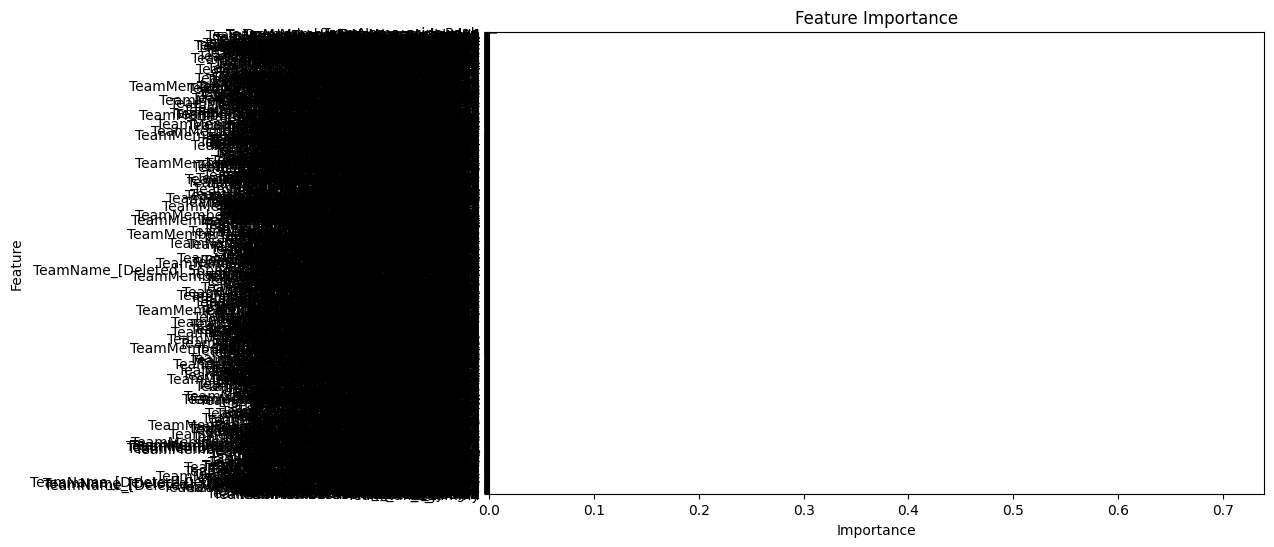

In [14]:
# Feature Importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

Model Saving for Production Use

In [15]:
# Save the Model
joblib.dump(model, 'inventory_management_model.pkl')
print("Model saved as 'inventory_management_model.pkl'.")

Model saved as 'inventory_management_model.pkl'.
